# Statistische Analyse
In diesem Jupyter-Notebook werden die vorhenden Wahlprogramme statistisch analysiert. Zu Beginn müssen alle Wahlprogramme, die uns im PDF-Format vorliegen, eingelesen werden. Hierfür haben wir uns für pdfpflumber entschieden. Der Einlesenprozess wurde in ein ausgelagertes Skript verschoben, um das Notebook übersichtlich zu halten.

In [1]:
# Aufsetzen der benötigten Daten
import utilities

programs = utilities.read_election_programs()

# Zugriff auf die Wahlprogramme am Beispiel der CDU
example = programs['cdu-csu']
# oder mittels Enum
union_program = programs[utilities.Parties.UNION.value]
if example == union_program:
    print('Die Wahlprograme sind gleich. Alles funktioniert wie erwartet.')

Lese Parteienprogramme ein...
Reading FDP_europawahlprogramm-2024_vorabversion.pdf...
Matched FDP_europawahlprogramm-2024_vorabversion.pdf to FDP
Reading AfD_Europawahlprogramm-2024-_-web.pdf...
Matched AfD_Europawahlprogramm-2024-_-web.pdf to AfD
Reading ÖDP_Programm_Europawahl2024_230224_ES.pdf...
Matched ÖDP_Programm_Europawahl2024_230224_ES.pdf to ÖDP
Reading Grüne_EU-Wahlprogramm2024_A4.pdf...
Matched Grüne_EU-Wahlprogramm2024_A4.pdf to Grüne
Reading Familien-Partei_Europawahlprogramm2024.pdf...
Matched Familien-Partei_Europawahlprogramm2024.pdf to Familien-Partei
Reading Freie-Wähler_Europawahlprogramm 2024.pdf...
Matched Freie-Wähler_Europawahlprogramm 2024.pdf to Freie-Wähler
Reading BSW_Europawahlprogramm_2024.pdf...
Matched BSW_Europawahlprogramm_2024.pdf to BSW
Reading cdu-csu_europawahlprogramm-2024_0.pdf...
Matched cdu-csu_europawahlprogramm-2024_0.pdf to cdu-csu
Reading Buendnis-Deutschland_europawahl-a5-doppelseiten-digital.pdf...
Matched Buendnis-Deutschland_europawahl-

## Wortfrequenzanalyse der Wahlprogramme

Für die Wortfrequenzanalyse werden die Wahlprogramme in einzelne Wörter zerlegt und die Häufigkeit der Wörter gezählt. Hierfür wurde `nltk` verwendet, um die Wörter zu tokenisieren und die Häufigkeiten zu zählen. Die `nltk` bekannten Stopwörter wurden um zusätzliche Stopwörter erweitert, um die Analyse zu verbessern.
Im Anschluss wurde noch ein Pool der häufigsten Wörter erstellt, übergreifend über alle Parteien erstellt, um die Übereinstimmung der häufigsten Wörter pro Partei mit den gesamten häufigsten Wörtern zu berechnen.

[nltk_data] Downloading package punkt to /Users/jonas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jonas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FDP: [('fordern', 34), ('mitgliedstaaten', 26), ('freie', 25), ('demokraten', 23), ('menschen', 21), ('unternehmen', 20), ('bürgerinnen', 15), ('unterstützen', 15), ('ermöglichen', 15), ('schaffen', 14), ('energie', 13), ('freiheit', 13), ('ukraine', 13), ('lehnen', 13), ('bürger', 12), ('stärken', 12), ('ziel', 12), ('wohlstand', 11), ('bürokratie', 11), ('dabei', 10)]

AfD: [('q', 93), ('deutschland', 88), ('staaten', 38), ('lehnen', 38), ('mitgliedstaaten', 36), ('deutschen', 36), ('bürger', 34), ('deutsche', 29), ('schutz', 25), ('seit', 25), ('dabei', 24), ('recht', 23), ('unternehmen', 23), ('immer', 23), ('nationalen', 23), ('fordert', 23), ('freiheit', 22), ('deutschlands', 22), ('nationalstaaten', 21), ('nationale', 20)]

ÖDP: [('seite', 75), ('ödp', 50), ('verbot', 36), ('z', 28), ('schutz', 26), ('menschen', 25), ('förderung', 22), ('fordert', 21), ('daten', 19), ('ziel', 17), ('recht', 17), ('mitgliedsstaaten', 15), ('innerhalb', 15), ('einführung', 14), ('natur', 13), ('bi

<BarContainer object of 15 artists>

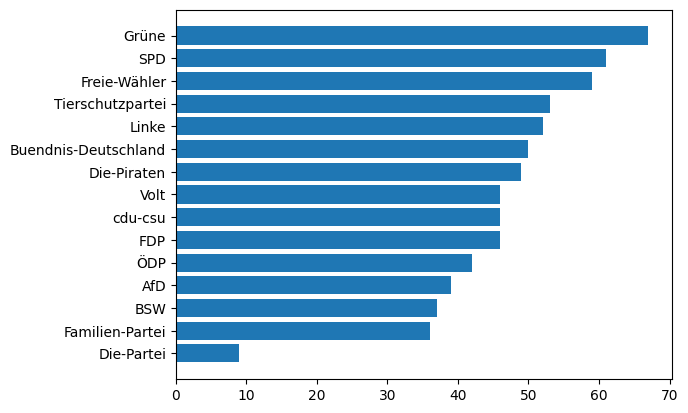

In [3]:
import nltk
from collections import defaultdict
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Download der benötigten Daten
nltk.download('punkt')
nltk.download('stopwords')

# Deutsche Stopwörter
stop_words = set(stopwords.words('german'))

# zusätzliche Stopwörter
additional_stop_words = ["sowie", "dass", "müssen", "setzen", "möchten", "können", "werden", "müssen", "wollen",
                         "sollen", "soll", "muss", "könnte", "könnten", "innen", "dafür", "zudem", "daher", "x", "y",
                         "https", "www", "krausenstr", "stehen", "zudem", "deshalb", "darüber", "darüberhinaus", "darf",
                         "statt", "str", "sollten", "insbesondere", "ab", "choriner", "straße"]
stop_words.update(additional_stop_words)

# optionale Stopwörter, die Parteien und unklare Begriffe beinhalten (ändern das Ergebnis der Analyse teils signifikant)
optional_stop_words = ["cdu", "csu", "spd", "grüne", "linke", "afd", "fdp", "partei", "volt", "piraten", "sptth",
                       "ceep", "ppeu", "mehr"]
stop_words.update(optional_stop_words)

# Stopworte Europa
eu_stop_words = ["eu", "europa", "europäisch", "europäische", "europäischen", "europäischer", "europäisches", "union"]
stop_words.update(eu_stop_words)


def analyze_word_frequencies() -> dict[str, dict[str, int]]:
    frequencies = defaultdict(dict)
    for freq_party, freq_program in programs.items():
        # Tokenisierung und Bereinigung der Programme
        words = word_tokenize(freq_program)
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

        # Zählen der Wörter
        word_frequencies = nltk.FreqDist(words)

        # Speichern der Häufigkeiten pro Partei
        frequencies[freq_party] = word_frequencies

    return frequencies


word_frequencies = analyze_word_frequencies()

# Ausgabe der häufigsten Wörter pro Partei
for freq_party, freq in word_frequencies.items():
    print(f"{freq_party}: {freq.most_common(20)}")
    print()

# Vereinigung der häufigsten Wörter (jede Partei einfach gewichtet)
all_words = defaultdict(int)
for freq_party, freq in word_frequencies.items():
    for word, count in freq.items():
        all_words[word] += count

# Ausgabe der häufigsten Wörter
print("\n====================================\n")
print("Vereinigung der häufigsten Wörter:")
sorted_all_words = dict(sorted(all_words.items(), key=lambda x: x[1], reverse=True)[:100])
print(sorted_all_words)

# Übereinstimmung der Parteien
freq_similarity = {}
for party, freq in word_frequencies.items():
    similarity = utilities.calculate_similarity(sorted_all_words, freq)
    freq_similarity[party] = similarity

# Sortieren der Übereinstimmungen
sorted_similarity = dict(sorted(freq_similarity.items(), key=lambda x: x[1], reverse=True))

print("\n====================================\n")
print("Übereinstimmung der Parteien:")
for party, similarity in sorted_similarity.items():
    print(f"{party}: {similarity}%")
    
# Plot der Ähnlichkeiten, invertierte Sortierung
reversed_similarity = dict(sorted(freq_similarity.items(), key=lambda x: x[1]))
plt.barh(list(reversed_similarity.keys()), list(reversed_similarity.values()))

### Fazit

Linke und sozialdemokratische Parteien, wie die SPD und die Grünen, verwenden in ihren Wahlprogrammen häufiger Wörter, die sich mit den gesamten Themen der Wahl beschäftigen.
In vielen Fällen überschneiden sich die häufigsten Wörter der Parteien (z.B. "menschen", "sicherheit", etc.) und es gibt auch wenige Überraschungen, welche Worte eine Partei verwendet. Ein gutes Beispiel hierfür ist das Bündnis Sarah Wagenknecht, welches Begriffe wie "gerechtigkeit" und "vernunft" besonders häufig verwendet.

## Längenvergleich der Wahlprogramme

Für den Längenvergleich der Programme wird der Text in Wörter zerlegt und die Anzahl der Wörter gezählt. Anschließend werden die Längen der Wahlprogramme verglichen und visualisiert.

Längen der Wahlprogramme:
Grüne: 59879
Linke: 39324
Volt: 31291
Tierschutzpartei: 27418
AfD: 19698
SPD: 19574
Freie-Wähler: 19520
Die-Piraten: 16609
Buendnis-Deutschland: 16239
ÖDP: 11961
BSW: 9540
FDP: 9176
cdu-csu: 7362
Familien-Partei: 5431
Die-Partei: 570


<BarContainer object of 15 artists>

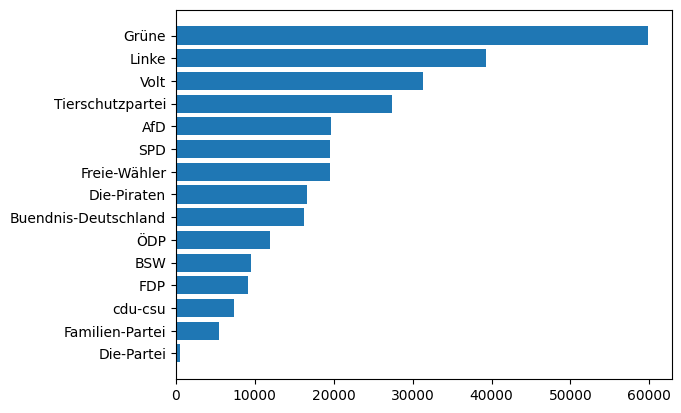

In [4]:
from matplotlib.pyplot import barh

lengths = {}
for party, program in programs.items():
    lengths[party] = program.split(" ").__len__()

# Sortieren der Längen
sorted_lengths = sorted(lengths.items(), key=lambda x: x[1], reverse=True)

# Ausgabe der Längen
print("Längen der Wahlprogramme:")
for party, length in sorted_lengths:
    print(f"{party}: {length}")
    
# Plot der Längen, invertierte Sortierung
reverse_sorted_lengths = dict(sorted(lengths.items(), key=lambda x: x[1]))
barh(list(reverse_sorted_lengths.keys()), list(reverse_sorted_lengths.values()))

### Fazit

Es gibt auch hier wenige Überraschungen: linke und progressive Parteien, und jene, die primär auf der europäischen Ebene tägig sind, haben tendenziell längere Wahlprogramme. Dies könnte auf eine detailliertere Ausarbeitung der politischen Ziele und Forderungen zurückzuführen sein.  

## Anzahl der Themen der Wahlprogramme

Laden des Modells
```bash
python -m spacy download de_core_news_lg


Für die Entitätenanalyse werden die Wahlprogramme mithilfe von `spacy` in einzelne Entitäten zerlegt und deren Häufigkeit gezählt. Hierfür wurde das deutsche Sprachmodell `de_core_news_lg` verwendet. Die Analyse konzentriert sich auf drei Entitätentypen:

1. MISC (Miscellaneous): Verschiedene Entitäten wie Ereignisse, Nationalitäten oder Konzepte.
2. ORG (Organization): Namen von Organisationen, Unternehmen oder Institutionen.
3. PER (Person): Namen von Personen oder Figuren.

Der Code verarbeitet jedes Wahlprogramm, extrahiert und zählt diese Entitäten. Anschließend wird die Gesamtzahl der Entitäten für jede Partei berechnet, was als Indikator für die thematische Breite des Programms dient. Die Ergebnisse werden am Ende noch visualisiert.

FDP (MISC): 160
FDP (ORG): 274
FDP (PER): 14
FDP (Gesamt): 448

AfD (MISC): 448
AfD (ORG): 477
AfD (PER): 47
AfD (Gesamt): 972

ÖDP (MISC): 186
ÖDP (ORG): 253
ÖDP (PER): 50
ÖDP (Gesamt): 489

Grüne (MISC): 1137
Grüne (ORG): 1242
Grüne (PER): 286
Grüne (Gesamt): 2665

Familien-Partei (MISC): 102
Familien-Partei (ORG): 104
Familien-Partei (PER): 7
Familien-Partei (Gesamt): 213

Freie-Wähler (MISC): 330
Freie-Wähler (ORG): 301
Freie-Wähler (PER): 38
Freie-Wähler (Gesamt): 669

BSW (MISC): 202
BSW (ORG): 239
BSW (PER): 57
BSW (Gesamt): 498

cdu-csu (MISC): 115
cdu-csu (ORG): 149
cdu-csu (PER): 8
cdu-csu (Gesamt): 272

Buendnis-Deutschland (MISC): 427
Buendnis-Deutschland (ORG): 526
Buendnis-Deutschland (PER): 30
Buendnis-Deutschland (Gesamt): 983

Tierschutzpartei (MISC): 430
Tierschutzpartei (ORG): 403
Tierschutzpartei (PER): 114
Tierschutzpartei (Gesamt): 947

Linke (MISC): 674
Linke (ORG): 854
Linke (PER): 48
Linke (Gesamt): 1576

Die-Piraten (MISC): 299
Die-Piraten (ORG): 194
Die-Pirat

<BarContainer object of 15 artists>

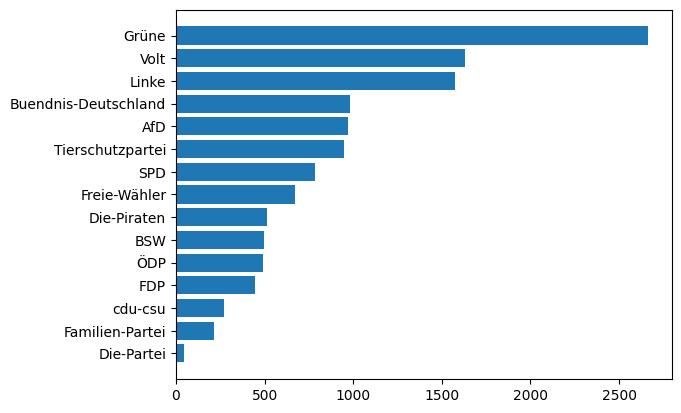

In [2]:
import spacy
import matplotlib.pyplot as plt

nlp = spacy.load("de_core_news_lg")

topic_counts = {}
# Visualisierung der Themen der Wahlprogramme
for party, program in programs.items():
    doc = nlp(program)
    entities_misc = [ent.text for ent in doc.ents if ent.label_ == "MISC"]
    # print(f"{party} (MISC): {entities_misc}")
    print(f"{party} (MISC): {len(entities_misc)}")

    entities_org = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    # print(f"{party} (ORG): {entities_org}")
    print(f"{party} (ORG): {len(entities_org)}")

    entities_per = [ent.text for ent in doc.ents if ent.label_ == "PER"]
    # print(f"{party} (PER): {entities_per}")
    print(f"{party} (PER): {len(entities_per)}")

    topic_counts[party] = len(entities_misc) + len(entities_org) + len(entities_per)
    print(f"{party} (Gesamt): {topic_counts[party]}")
    print()
    
# plot comparison of total topics per party, horizontal bar chart
topic_counts = dict(sorted(topic_counts.items(), key=lambda x: x[1]))
plt.barh(list(topic_counts.keys()), list(topic_counts.values()))

### Fazit

Die Anzahl der Themen in den Wahlprogrammen ist ein weiterer Indikator für die thematische Breite und Vielfalt der politischen Ziele und dekt sich insoweit zum großen Teil mit den Analyse der Längen der Wahlprogramme. 
Etablierte Parteien, wie die CDU/CSU und FDP, die erher konservativ und liberal ausgerichtet sind, haben überraschend wenige Themen in ihren Wahlprogrammen.

## Programm mit den meisten Adjektiven

Um herauszufinden, welche Partei gesehen auf die Parteiprogrammlänge die meisten Adjektive verwendet, wird der Text zuerst in einzelne Wörter zerlegt. Anschließend werden mithilfe eines POS-Taggers die Wortarten bestimmt. Adjektive, deren Tags 'JJ' (Adjektiv), 'JJR' (Komparativ) oder 'JJS' (Superlativ) sind, werden gezählt und ihr Anteil an der Gesamtwortanzahl berechnet.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jonas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<BarContainer object of 15 artists>

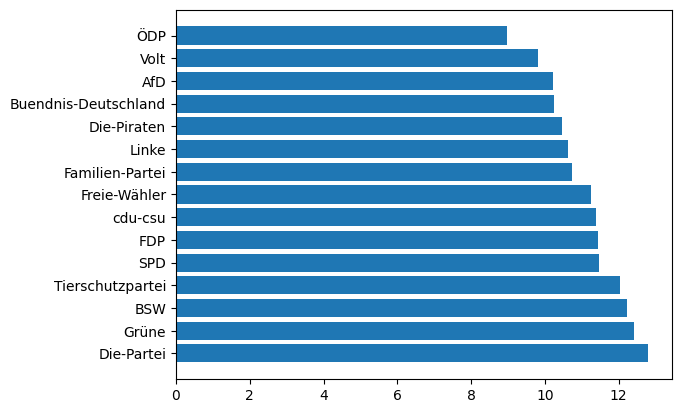

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt

nltk.download('averaged_perceptron_tagger')

def count_adjectives(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Get the part of speech tags for each word
    pos_tags = pos_tag(words)
    # Count adjectives (tags: 'JJ', 'JJR', 'JJS')
    adjective_count = sum(1 for word, tag in pos_tags if tag in ['JJ', 'JJR', 'JJS'])
    return adjective_count

adjective_percentages = {}
for party, program in programs.items():
    adjective_percentages[party] = count_adjectives(programs[party])/lengths[party]*100

sorted_adjective_percentages = sorted(adjective_percentages.items(), key=lambda x: x[1], reverse=True)

plt.barh([item[0] for item in sorted_adjective_percentages], [item[1] for item in sorted_adjective_percentages])

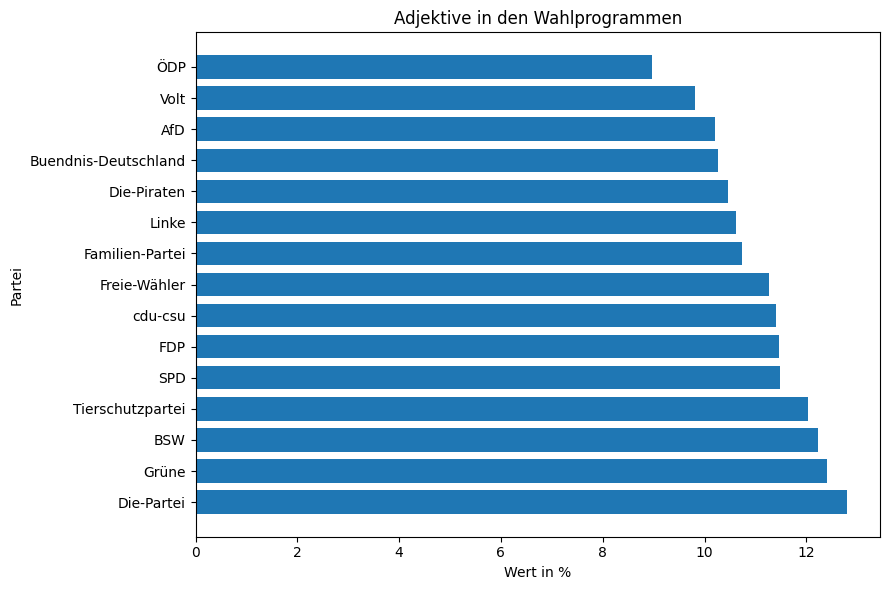

In [18]:
import numpy as np

parties = [item[0] for item in sorted_adjective_percentages]
values = [item[1] for item in sorted_adjective_percentages]

bar_width = 0.75
x = np.arange(len(parties))

fig, ax = plt.subplots(figsize=(9, 6))


bars = ax.barh(x, values, bar_width)

ax.set_ylabel('Partei')
ax.set_xlabel('Wert in %')
ax.set_title('Adjektive in den Wahlprogrammen')
ax.set_yticks(x)
ax.set_yticklabels(parties)

plt.tight_layout()
plt.show()

### Fazit

Gemessen an den meisten adjektiven lässt sich die Verwendung von Adjektiven nicht einer politischen Strömung zuordnen, es fällt allerdings auf, dass die Parteien am politisch linken oder rechten Rand tendenziell von weniger Adjektiven gebrauch machen. Der niedrigere Beschreibungsgrad könnte auf einen höheren Anteil an vereinfachten, populistischen Aussagen hindeuten, ohne eine weitere Analyse bleibt dies allerdings nur eine Spekulation.

## Wie populistisch sind die Programme?

Durch die Identifizierung und Zählung populistischer Schlüsselwörter können wir feststellen, wie stark eine Partei auf emotional aufgeladene und polarisierende Begriffe setzt. Die Wörter wurden hierbei mit Hilfe von ChatGPT generiert, da wir uns davon eine genauere Abdeckung versprochen haben als von einer selbst kuratierten Liste.

Zusätzlich zur Analyse der Wortwahl wird auch die Lesbarkeit der Texte bewertet, um zu sehen, wie zugänglich und verständlich die Wahlprogramme für die breite Öffentlichkeit sind. Diese beiden Aspekte – die Verwendung populistischer Begriffe und die Lesbarkeit – können wichtige Hinweise darauf geben, wie Parteien versuchen, ihre Botschaften zu positionieren und welche Zielgruppen sie ansprechen wollen.

<BarContainer object of 15 artists>

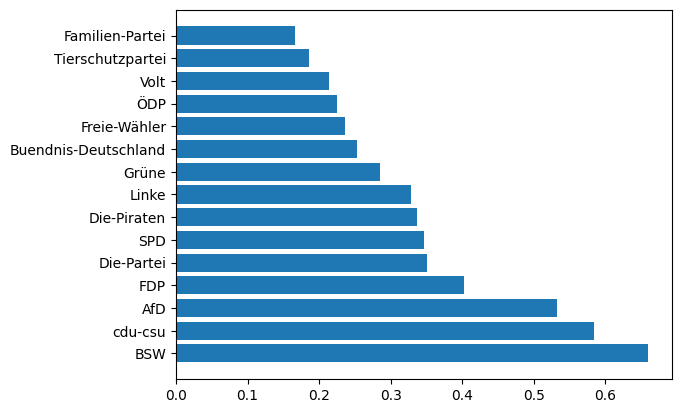

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from collections import Counter
import pyphen

dic = pyphen.Pyphen(lang='de')

# Beispiel populistische Schlüsselwörter
populist_keywords = [
    "volk",
    "elite",
    "heimat",
    "vaterland",
    "nation",
    "identität",
    "tradition",
    "souveränität",
    "grenzschutz",
    "patriotismus",
    "widerstand",
    "freiheit",
    "unabhängigkeit",
    "revolution",
    "gerechtigkeit",
    "volkswillen",
    "system",
    "establishment",
    "multikulti",
    "fremdenfeindlichkeit",
    "nationalismus",
    "islamisierung",
    "leitkultur",
    "überfremdung",
    "rechtsstaat",
    "meinungsfreiheit",
    "zensur",
    "verschwörung",
    "fake news",
    "lügenpresse",
    "mainstream",
    "volksverräter",
    "globalismus",
    "antifa",
    "sozialtourismus",
    "volksgemeinschaft",
    "einwanderung",
    "migrationspakt",
    "asylchaos",
    "willkommenskultur",
    "gendersprache",
    "abgehoben",
    "volksvertreter",
    "gutmenschen",
    "dekadenz",
    "ausverkauf",
    "sozialstaat",
    "schattenregierung",
    "bevölkerungsaustausch",
    "wutbürger",
    "demokratie",
    "heimatliebe",
    "hochverrat",
    "terrorgefahr",
    "sicherheitslage",
    "machenschaften",
    "hinterzimmer",
    "obrigkeit",
    "selbstbestimmung",
    "marionetten",
    "korruption",
    "heimatvertriebene",
    "kulturkampf",
    "unterdrückung",
    "nationalstolz",
    "volkspartei",
    "blockparteien",
    "mainstreammedien",
    "krisenbewältigung",
    "volkswirtschaft",
    "eurokrise",
    "finanzoligarchie",
    "inflationsangst",
    "systemmedien",
    "scheindemokratie",
    "umvolkung",
    "bürgerwille",
    "machterhalt",
    "linksradikal",
    "rechtsradikal",
    "terroristen",
    "parallelgesellschaft",
    "radikalisierung",
    "finanzelite",
    "moralapostel",
    "klimaangst",
    "verteilungskampf",
    "kulturverfall",
    "heimatgefühl",
    "volksnah",
    "staatsversagen",
    "scheindebatte",
    "elitenverschwörung",
    "meinungsmacher",
    "kulturveränderung",
    "subventionen",
    "steuerlast",
    "sozialabbau",
    "massenmigration",
    "meinungselite"
]

def count_populist_keywords(text):
    words = word_tokenize(text.lower(), language='german')
    word_count = Counter(words)
    populist_percentage = sum(word_count[keyword] for keyword in populist_keywords)
    return populist_percentage

def calculate_syllables(word):
    syllables = dic.inserted(word).split('-')
    return len(syllables)

def calculate_readability(text):
    words = word_tokenize(text.lower(), language='german')
    syllable_count = sum(calculate_syllables(word) for word in words)
    blob = TextBlob(text)
    sentence_count = len(blob.sentences)
    return syllable_count, sentence_count

analyse_ergebnisse = []
for party, program in programs.items():
    populist_percentage = count_populist_keywords(program)/lengths[party]*100
    syllable_count, sentence_count = calculate_readability(program)
    readability_score = syllable_count / (sentence_count + 1)  # Grobe Lesbarkeitschätzung
    
    analyse_ergebnisse.append({
        'party': party,
        'populist_percentage': populist_percentage,
        'readability_score': readability_score
    })

sorted_analyse_ergebnisse = sorted(analyse_ergebnisse, key=lambda x: x['populist_percentage'], reverse=True)

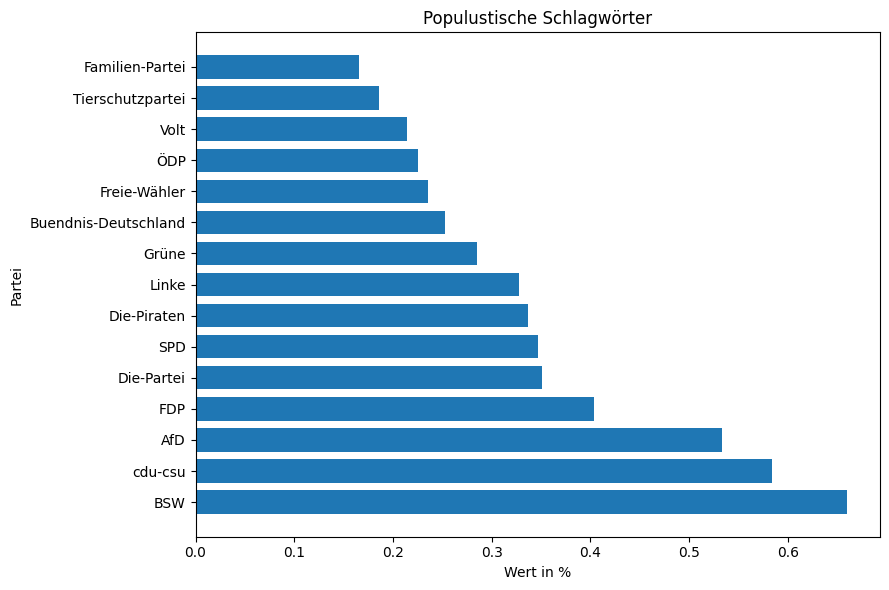

In [17]:
parties = [item['party'] for item in sorted_analyse_ergebnisse]
values = [item['populist_percentage'] for item in sorted_analyse_ergebnisse]

bar_width = 0.75
x = np.arange(len(parties))

fig, ax = plt.subplots(figsize=(9, 6))


bars = ax.barh(x, values, bar_width)

ax.set_ylabel('Partei')
ax.set_xlabel('Wert in %')
ax.set_title('Populustische Schlagwörter')
ax.set_yticks(x)
ax.set_yticklabels(parties)

plt.tight_layout()
plt.show()

### Fazit

Es lässt sich erkennen, dass alle Parteien, die rechte Sozialpolitik betreiben, führend bei der Verwendung von populistischen Stichwörtern in ihren Wahlprogrammen sind. Migration war bei der EU-Wahl das zentrale Thema und dieses wurde vor allem von Parteien rechts der Mitte mit oft populistischen Statements aufgegriffen, was das klare Ergebnis erklärt.